In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!gdown 1qXoDeYVC4vhd7xTNwohxh9dMCjjtoHoJ

Downloading...
From: https://drive.google.com/uc?id=1qXoDeYVC4vhd7xTNwohxh9dMCjjtoHoJ
To: /content/cars24-car-price-cleaned-new.csv
100% 1.55M/1.55M [00:00<00:00, 32.0MB/s]


In [3]:
df = pd.read_csv('cars24-car-price-cleaned-new.csv')
df.head()

,selling_price,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


In [4]:
df['model'].nunique()

3233

In [5]:
df['make'].nunique()

41

## Target Variable encoding

In [6]:
df['make']

,make
0,MARUTI
1,HYUNDAI
2,HYUNDAI
3,MARUTI
4,FORD
...,...
19815,TOYOTA
19816,MARUTI
19817,SKODA
19818,MAHINDRA


In [7]:
df['make'] = df.groupby('make')['selling_price'].transform('mean')

In [8]:
df['make']

,make
0,4.684721
1,5.458819
2,5.458819
3,4.684721
4,5.858258
...,...
19815,10.532763
19816,4.684721
19817,7.182097
19818,7.315421


In [9]:
df['model']

,model
0,ALTO STD
1,GRAND I10 ASTA
2,I20 ASTA
3,ALTO K10 2010-2014 VXI
4,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV
...,...
19815,PLATINUM ETIOS 1.4 GXD
19816,ERTIGA BSIV VXI
19817,RAPID 1.5 TDI ELEGANCE
19818,XUV500 W6 2WD


In [10]:
df['model'] = df.groupby('model')['selling_price'].transform('mean')

In [11]:
df

,selling_price,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,120000,19.70,796.0,46.30,11.0,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,5.50,20000,18.90,1197.0,82.00,7.0,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2.15,60000,17.00,1197.0,80.00,13.0,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2.26,37000,20.92,998.0,67.10,11.0,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,5.70,30000,22.77,1498.0,98.59,8.0,5.858258,6.777576,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19815,6.50,69480,23.59,1364.0,67.05,6.0,10.532763,7.075000,0,0,1,0,0,0,1,1,0
19816,9.25,18000,17.50,1373.0,91.10,4.0,4.684721,7.128571,0,0,0,0,0,1,1,0,1
19817,4.25,67000,21.14,1498.0,103.52,8.0,7.182097,4.454000,0,0,1,0,0,0,1,1,0
19818,12.25,3800000,16.00,2179.0,140.00,7.0,7.315421,8.096522,0,0,1,0,0,0,1,0,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [13]:
scaler.fit_transform(df)

array([[0.04368402, 0.03155346, 0.13534483, ..., 1.        , 1.        ,
        0.        ],
       [0.25239655, 0.00523698, 0.12844828, ..., 1.        , 1.        ,
        0.        ],
       [0.08979493, 0.01576357, 0.11206897, ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.19172431, 0.01760573, 0.14775862, ..., 1.        , 1.        ,
        0.        ],
       [0.5800267 , 1.        , 0.10344828, ..., 1.        , 0.        ,
        1.        ],
       [0.56789225, 0.00339483, 0.12068966, ..., 0.        , 1.        ,
        0.        ]])

In [12]:

df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,selling_price,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.043684,0.031553,0.135345,0.117891,0.066506,0.310345,0.194048,0.041550,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.252397,0.005237,0.128448,0.177281,0.123994,0.172414,0.232517,0.218382,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.089795,0.015764,0.112069,0.177281,0.120773,0.379310,0.232517,0.149143,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.095134,0.009711,0.145862,0.147808,0.100000,0.310345,0.194048,0.093193,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.262104,0.007869,0.161810,0.221860,0.150709,0.206897,0.252367,0.313574,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [14]:
df

,selling_price,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.043684,0.031553,0.135345,0.117891,0.066506,0.310345,0.194048,0.041550,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.252397,0.005237,0.128448,0.177281,0.123994,0.172414,0.232517,0.218382,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.089795,0.015764,0.112069,0.177281,0.120773,0.379310,0.232517,0.149143,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.095134,0.009711,0.145862,0.147808,0.100000,0.310345,0.194048,0.093193,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.262104,0.007869,0.161810,0.221860,0.150709,0.206897,0.252367,0.313574,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19815,0.300934,0.018258,0.168879,0.202014,0.099919,0.137931,0.484670,0.328028,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
19816,0.434413,0.004711,0.116379,0.203347,0.138647,0.068966,0.194048,0.330632,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
19817,0.191724,0.017606,0.147759,0.221860,0.158647,0.206897,0.318156,0.200656,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
19818,0.580027,1.000000,0.103448,0.322719,0.217391,0.172414,0.324782,0.377671,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


## Correct Way

In [30]:
df1 = pd.read_csv('cars24-car-price-cleaned-new.csv')

In [31]:
df1

,selling_price,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19815,6.50,69480,23.59,1364.0,67.05,6.0,TOYOTA,PLATINUM ETIOS 1.4 GXD,0,0,1,0,0,0,1,1,0
19816,9.25,18000,17.50,1373.0,91.10,4.0,MARUTI,ERTIGA BSIV VXI,0,0,0,0,0,1,1,0,1
19817,4.25,67000,21.14,1498.0,103.52,8.0,SKODA,RAPID 1.5 TDI ELEGANCE,0,0,1,0,0,0,1,1,0
19818,12.25,3800000,16.00,2179.0,140.00,7.0,MAHINDRA,XUV500 W6 2WD,0,0,1,0,0,0,1,0,1


In [32]:
## First split

## Then  Do taregt encoding using only training data

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
df.shape

(19820, 17)

In [35]:
 df_train, df_test = train_test_split(df1, test_size = 0.2, random_state = 1)

In [36]:
df_train.shape

(15856, 17)

In [37]:
df_test.shape

(3964, 17)

In [38]:
make_category_wise_mean = df_train.groupby('make')['selling_price'].mean()
model_category_wise_mean = df_train.groupby('model')['selling_price'].mean()

In [44]:
model_category_wise_mean

,selling_price
model,
1 SERIES 118D SPORT LINE,12.825000
1 SERIES 118D SPORT PLUS,9.850000
1.4GSI,1.516667
1000 AC,1.330000
3 SERIES 316I,10.000000
...,...
ZEST QUADRAJET 1.3 XT,4.791667
ZEST REVOTRON 1.2 XT,4.062500
ZEST REVOTRON 1.2T XE,3.333333


In [39]:
df_train['make'] = df_train.groupby('make')['selling_price'].transform('mean')
df_train['model'] = df_train.groupby('model')['selling_price'].transform('mean')

In [40]:
df_test['make'] = df_test['make'].map(make_category_wise_mean)

In [41]:
df_test

,selling_price,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
14690,1.35,70000,17.00,1086.0,5.00,14.0,5.452180,SANTRO XING GL PLUS CNG,1,0,0,0,0,0,1,1,0
134,4.15,58000,25.20,1248.0,74.00,8.0,4.683852,SWIFT VDI BSIV,0,0,1,0,0,0,1,1,0
4982,4.90,50000,25.32,1198.0,77.00,6.0,7.371828,KUV100 NXT D75 K8,0,0,1,0,0,0,1,0,1
11940,3.31,72000,16.80,1497.0,118.00,13.0,5.937306,CITY 1.5 V AT,0,0,0,0,0,1,0,1,0
10861,5.80,70000,26.59,1248.0,74.00,8.0,4.683852,SWIFT DZIRE VDI,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,7.40,65000,26.08,1462.0,91.19,6.0,4.683852,ERTIGA CNG VXI,0,0,0,0,0,0,1,0,1
5256,8.80,13133,24.40,1498.0,98.63,4.0,5.798344,FREESTYLE TITANIUM PLUS DIESEL BSIV,0,0,1,0,0,0,1,1,0
10910,7.00,100000,19.87,1461.0,83.80,6.0,4.577854,DUSTER 85PS DIESEL RXZ,1,0,1,0,0,0,1,1,0
7385,7.15,90000,15.96,2523.0,62.10,5.0,7.371828,BOLERO 2011-2019 EX AC,1,0,1,0,0,0,1,0,1


In [42]:
df_test['model'] = df_test['model'].map(model_category_wise_mean)

In [43]:
df_test

,selling_price,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
14690,1.35,70000,17.00,1086.0,5.00,14.0,5.452180,NaN,1,0,0,0,0,0,1,1,0
134,4.15,58000,25.20,1248.0,74.00,8.0,4.683852,4.679255,0,0,1,0,0,0,1,1,0
4982,4.90,50000,25.32,1198.0,77.00,6.0,7.371828,6.000000,0,0,1,0,0,0,1,0,1
11940,3.31,72000,16.80,1497.0,118.00,13.0,5.937306,3.465385,0,0,0,0,0,1,0,1,0
10861,5.80,70000,26.59,1248.0,74.00,8.0,4.683852,5.263913,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,7.40,65000,26.08,1462.0,91.19,6.0,4.683852,8.625000,0,0,0,0,0,0,1,0,1
5256,8.80,13133,24.40,1498.0,98.63,4.0,5.798344,7.710000,0,0,1,0,0,0,1,1,0
10910,7.00,100000,19.87,1461.0,83.80,6.0,4.577854,7.490000,1,0,1,0,0,0,1,1,0
7385,7.15,90000,15.96,2523.0,62.10,5.0,7.371828,7.500000,1,0,1,0,0,0,1,0,1


In [45]:
df_test.isna().sum()

,0
selling_price,0
km_driven,0
mileage,0
engine,0
max_power,0
age,0
make,3
model,258
Individual,0
Trustmark Dealer,0


In [46]:
global_mean = df_train['selling_price'].mean()

In [47]:
df_test['make'] = df_test['make'].fillna(global_mean)
df_test['model'] = df_test['model'].fillna(global_mean)

In [48]:
df_test

,selling_price,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
14690,1.35,70000,17.00,1086.0,5.00,14.0,5.452180,6.573871,1,0,0,0,0,0,1,1,0
134,4.15,58000,25.20,1248.0,74.00,8.0,4.683852,4.679255,0,0,1,0,0,0,1,1,0
4982,4.90,50000,25.32,1198.0,77.00,6.0,7.371828,6.000000,0,0,1,0,0,0,1,0,1
11940,3.31,72000,16.80,1497.0,118.00,13.0,5.937306,3.465385,0,0,0,0,0,1,0,1,0
10861,5.80,70000,26.59,1248.0,74.00,8.0,4.683852,5.263913,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,7.40,65000,26.08,1462.0,91.19,6.0,4.683852,8.625000,0,0,0,0,0,0,1,0,1
5256,8.80,13133,24.40,1498.0,98.63,4.0,5.798344,7.710000,0,0,1,0,0,0,1,1,0
10910,7.00,100000,19.87,1461.0,83.80,6.0,4.577854,7.490000,1,0,1,0,0,0,1,1,0
7385,7.15,90000,15.96,2523.0,62.10,5.0,7.371828,7.500000,1,0,1,0,0,0,1,0,1


In [54]:
scaler = MinMaxScaler()

In [55]:
scaler

MinMaxScaler()

In [56]:
df_train = pd.DataFrame(scaler.fit_transform(df_train), columns=df.columns)

In [57]:
scaler

MinMaxScaler()

In [52]:
df_test = pd.DataFrame(scaler.transform(df_test), columns=df.columns)

In [58]:
df_test = pd.DataFrame(scaler.transform(df_test), columns=df.columns)

In [60]:
y_train = df_train['selling_price']

In [59]:
X_train = df_train.drop('selling_price', axis=1)

In [62]:
df_train.shape

(15856, 17)

In [61]:
y_train.shape, X_train.shape

((15856,), (15856, 16))

In [63]:
y_test = df_test['selling_price']
X_test = df_test.drop('selling_price', axis=1)
y_test.shape, X_test.shape

((3964,), (3964, 16))

## Linear Regression

In [65]:
 X_train[['model']]

,model
0,0.541854
1,0.256348
2,0.169846
3,0.229485
4,0.211603
...,...
15851,0.217066
15852,0.242141
15853,0.138833
15854,0.225165


In [66]:
## find X, y and fit in model in sklearn

X1_train = X_train[['model']]

X1_test = X_test[['model']]

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
model = LinearRegression()

model.fit(X1_train, y_train)

LinearRegression()

In [70]:
model.coef_

array([0.99878656])

In [71]:
model.intercept_

np.float64(0.0012134449702704275)

In [73]:
y_hat = model.predict(X1_test)

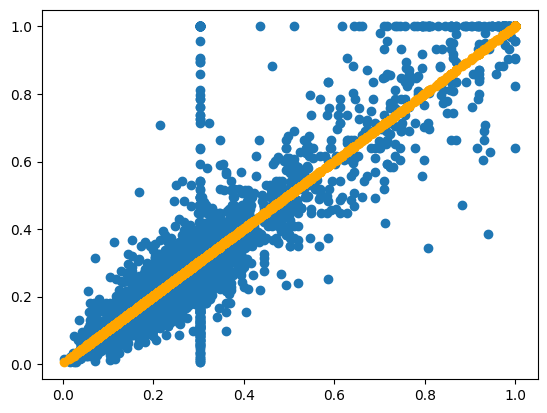

In [74]:
plt.scatter(X_test[['model']],y_test,label='data') ## True

plt.scatter(X_test[['model']],y_hat,color='orange',label='prediction') ## prediction

## Multivariate Linear Regression

In [75]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [77]:
X_train

,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.004974,0.142241,0.234301,0.195169,0.12,0.205639,0.541854,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.004974,0.145603,0.177281,0.123671,0.12,0.166136,0.256348,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.016027,0.142241,0.236671,0.158615,0.28,0.299913,0.169846,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.018658,0.161207,0.221860,0.136618,0.32,0.223437,0.229485,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.014974,0.182759,0.184834,0.111111,0.20,0.166136,0.211603,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15851,0.005237,0.164655,0.147808,0.099903,0.08,0.166136,0.217066,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
15852,0.010500,0.118966,0.177429,0.131562,0.16,0.230581,0.242141,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
15853,0.007869,0.182500,0.118335,0.077778,0.20,0.160687,0.138833,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
15854,0.014185,0.069397,0.322719,0.185185,0.36,0.304336,0.225165,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [76]:
model.fit(X_train, y_train)

LinearRegression()

In [78]:
model.coef_

array([-0.28076283, -0.23638633,  0.06730188,  0.04462237, -0.21364694,
        0.06512446,  0.86244191, -0.00696494, -0.00547411,  0.00565639,
        0.12133594,  0.01353475, -0.00779309, -0.00405041, -0.01404155,
       -0.02157845])

In [79]:
model.intercept_

np.float64(0.1170644658942108)

## How will I evaluate ? How good my model is